In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
import seaborn as sns
from collections import OrderedDict
from scipy.stats.mstats import gmean
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.stats.multicomp import multipletests
#from bioinfokit.analys import get_data
import numpy as np
import pandas as pd
#from statannotations.Annotator import Annotator
import time
import itertools


fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline



In [2]:
Central=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/MHW/CentralSoG_HeatMapCorrelations.xlsx',engine='openpyxl')

In [3]:
Central

,Year,Temp,Diatoms,Nanoflag,Salinity,Halocline,Euphausiids,Large_Calanoids,Med_Calanoids,Larvaceans,Chaetognaths,Ctenophores
0,2007,10.130163,0.525417,0.392837,27.723134,1.098655,10.848705,10.157284,21.920420,3.611386,4.700437,3.443071
1,2008,9.847017,0.633651,0.384602,28.352335,1.317493,33.781815,3.435171,9.653368,1.293623,18.821915,0.509557
2,2009,9.948742,0.587538,0.446601,28.633451,1.053774,18.052020,2.594187,19.703810,11.357939,17.041778,0.546557
3,2010,10.131540,0.564632,0.411210,28.101097,0.933935,34.247171,5.227542,11.689161,1.711984,14.346852,8.252776
4,2011,9.781198,0.513584,0.383201,27.660227,1.176562,13.506061,37.324435,10.010018,1.457950,5.114670,2.428430
5,2012,9.611432,0.552724,0.377186,27.581353,1.113016,9.438730,6.203850,13.148693,33.523573,5.059853,3.634159
6,2013,10.033374,0.551155,0.378415,27.936856,1.116810,12.387786,32.603571,11.413901,16.424863,2.959546,2.139992
7,2014,10.331742,0.504860,0.432929,27.931495,0.824409,8.237520,5.206008,23.365692,1.895943,7.948150,2.097419
8,2015,10.594826,0.529697,0.459943,27.987306,1.207461,20.847402,7.287422,20.058857,4.594755,11.819020,2.839532
9,2016,10.359586,0.529819,0.417567,27.827481,1.132614,9.910907,3.725869,13.935365,6.214129,5.851626,15.034249


In [4]:
Central.keys()

Index(['Year', 'Temp', 'Diatoms', 'Nanoflag', 'Salinity', 'Halocline',
       'Euphausiids', 'Large_Calanoids', 'Med_Calanoids', 'Larvaceans',
       'Chaetognaths', 'Ctenophores'],
      dtype='object')

In [5]:
Central.drop(labels=['Year','Halocline'],axis=1,inplace=True)

In [6]:
#Phen.rename(columns={'Wind (Jan-May)':'Wind','PAR (Feb-May)':'PAR','SSS (Jan-May)':'SSS','SpringSST':'SST','Fraser Peak Discharge':'Fraser River Discharge','Bloom_Start':'Bloom Initiation','Bloom_Intensity':'Bloom Intensity','Bloom_Magnitude':'Bloom Magnitude'},inplace=True)

In [7]:
Central.cov()

,Temp,Diatoms,Nanoflag,Salinity,Euphausiids,Large_Calanoids,Med_Calanoids,Larvaceans,Chaetognaths,Ctenophores
Temp,0.060380,-0.002331,0.004534,0.012813,0.135321,-0.650572,0.591769,-1.079493,-0.001726,0.224561
Diatoms,-0.002331,0.001148,-0.000050,0.007111,0.162618,-0.091146,-0.041992,0.018415,0.104652,-0.031992
Nanoflag,0.004534,-0.000050,0.000903,0.004986,0.008145,-0.131476,0.066701,-0.062695,0.019986,-0.008372
Salinity,0.012813,0.007111,0.004986,0.095028,1.240446,-1.218110,0.201009,-0.590475,0.974902,-0.429574
Euphausiids,0.135321,0.162618,0.008145,1.240446,69.546556,-24.841224,-11.101208,-25.809195,27.728686,-1.926031
Large_Calanoids,-0.650572,-0.091146,-0.131476,-1.218110,-24.841224,105.134446,-16.712887,-0.810429,-25.133845,-7.695960
Med_Calanoids,0.591769,-0.041992,0.066701,0.201009,-11.101208,-16.712887,17.602611,-6.968799,-0.101802,-2.740040
Larvaceans,-1.079493,0.018415,-0.062695,-0.590475,-25.809195,-0.810429,-6.968799,69.151833,-11.319095,-1.231972
Chaetognaths,-0.001726,0.104652,0.019986,0.974902,27.728686,-25.133845,-0.101802,-11.319095,23.009513,-3.829773
Ctenophores,0.224561,-0.031992,-0.008372,-0.429574,-1.926031,-7.695960,-2.740040,-1.231972,-3.829773,13.925499


In [8]:
def annot(cor,p):
    if p<0.01:
        istr=f'{cor:.2f}**'
    elif p<0.05:
        istr=f'{cor:.2f}*'
    else:
        istr=f'{cor:.2f}'
    return istr

In [9]:
def getPearsonR(idf):
    ll=np.shape(idf)[1]
    cors=np.empty((ll,ll))
    ps=np.empty((ll,ll))
    nots=np.empty((ll,ll),dtype="<U10")
    for ii in range(0,ll):
        for jj in range(0,ll):
            cors[ii,jj],ps[ii,jj]=stats.pearsonr(idf.iloc[:,ii],idf.iloc[:,jj])
    for ii in range(0,ll):
        for jj in range(0,ll):
            nots[ii,jj]=annot(cors[ii,jj],ps[ii,jj])
    for ii in range (0,ll):
        nots[ii,ii]=""
    return cors,ps,nots

In [10]:
icor,ip,inot=getPearsonR(Central) #icor = correlation, ip = pvalue, inot=annotation

In [11]:
ip

array([[0.00000000e+000, 2.93564256e-001, 1.13867154e-002,
        5.31140543e-001, 8.08019615e-001, 3.34255665e-001,
        2.00632050e-002, 3.54114708e-002, 9.95704540e-001,
        3.60634916e-001],
       [2.93564256e-001, 0.00000000e+000, 8.56040204e-001,
        3.69824831e-003, 1.96670645e-002, 3.26287979e-001,
        2.66678350e-001, 8.09956452e-001, 7.10822254e-003,
        3.44413730e-001],
       [1.13867154e-002, 8.56040204e-001, 0.00000000e+000,
        3.14867221e-002, 9.04880044e-001, 9.92542447e-002,
        3.50758104e-002, 3.48570390e-001, 6.08543029e-001,
        7.83442533e-001],
       [5.31140543e-001, 3.69824831e-003, 3.14867221e-002,
        0.00000000e+000, 5.83603538e-002, 1.40450096e-001,
        5.65459459e-001, 3.90750879e-001, 5.46604210e-003,
        1.54244628e-001],
       [8.08019615e-001, 1.96670645e-002, 9.04880044e-001,
        5.83603538e-002, 5.57453849e-111, 2.75035314e-001,
        2.31141226e-001, 1.55753175e-001, 2.90811454e-003,
        8.1

In [12]:
icor

array([[ 1.        , -0.27999738,  0.61407757,  0.16915303,  0.06603602,
        -0.25821245,  0.5740079 , -0.52829012, -0.00146473,  0.24489684],
       [-0.27999738,  1.        , -0.04932837,  0.68075796,  0.57550581,
        -0.26235124, -0.29539315,  0.06535821,  0.64389111, -0.25301689],
       [ 0.61407757, -0.04932837,  1.        ,  0.53825257,  0.03250375,
        -0.42674929,  0.52910844, -0.25091598,  0.13866535, -0.07467018],
       [ 0.16915303,  0.68075796,  0.53825257,  1.        ,  0.48251779,
        -0.38537828,  0.15541719, -0.230342  ,  0.65929599, -0.37342682],
       [ 0.06603602,  0.57550581,  0.03250375,  0.48251779,  1.        ,
        -0.29051105, -0.31728085, -0.37216437,  0.69316681, -0.06188993],
       [-0.25821245, -0.26235124, -0.42674929, -0.38537828, -0.29051105,
         1.        , -0.38849945, -0.00950475, -0.51101389, -0.20113372],
       [ 0.5740079 , -0.29539315,  0.52910844,  0.15541719, -0.31728085,
        -0.38849945,  1.        , -0.19974114

In [13]:
inot

array([['', '-0.28', '0.61*', '0.17', '0.07', '-0.26', '0.57*', '-0.53*',
        '-0.00', '0.24'],
       ['-0.28', '', '-0.05', '0.68**', '0.58*', '-0.26', '-0.30',
        '0.07', '0.64**', '-0.25'],
       ['0.61*', '-0.05', '', '0.54*', '0.03', '-0.43', '0.53*', '-0.25',
        '0.14', '-0.07'],
       ['0.17', '0.68**', '0.54*', '', '0.48', '-0.39', '0.16', '-0.23',
        '0.66**', '-0.37'],
       ['0.07', '0.58*', '0.03', '0.48', '', '-0.29', '-0.32', '-0.37',
        '0.69**', '-0.06'],
       ['-0.26', '-0.26', '-0.43', '-0.39', '-0.29', '', '-0.39',
        '-0.01', '-0.51*', '-0.20'],
       ['0.57*', '-0.30', '0.53*', '0.16', '-0.32', '-0.39', '', '-0.20',
        '-0.01', '-0.18'],
       ['-0.53*', '0.07', '-0.25', '-0.23', '-0.37', '-0.01', '-0.20',
        '', '-0.28', '-0.04'],
       ['-0.00', '0.64**', '0.14', '0.66**', '0.69**', '-0.51*', '-0.01',
        '-0.28', '', '-0.21'],
       ['0.24', '-0.25', '-0.07', '-0.37', '-0.06', '-0.20', '-0.18',
        '-0.04'

In [14]:
np.shape(Central)

(16, 10)

Text(0.5, 1.0, 'Central Strait of Georgia')

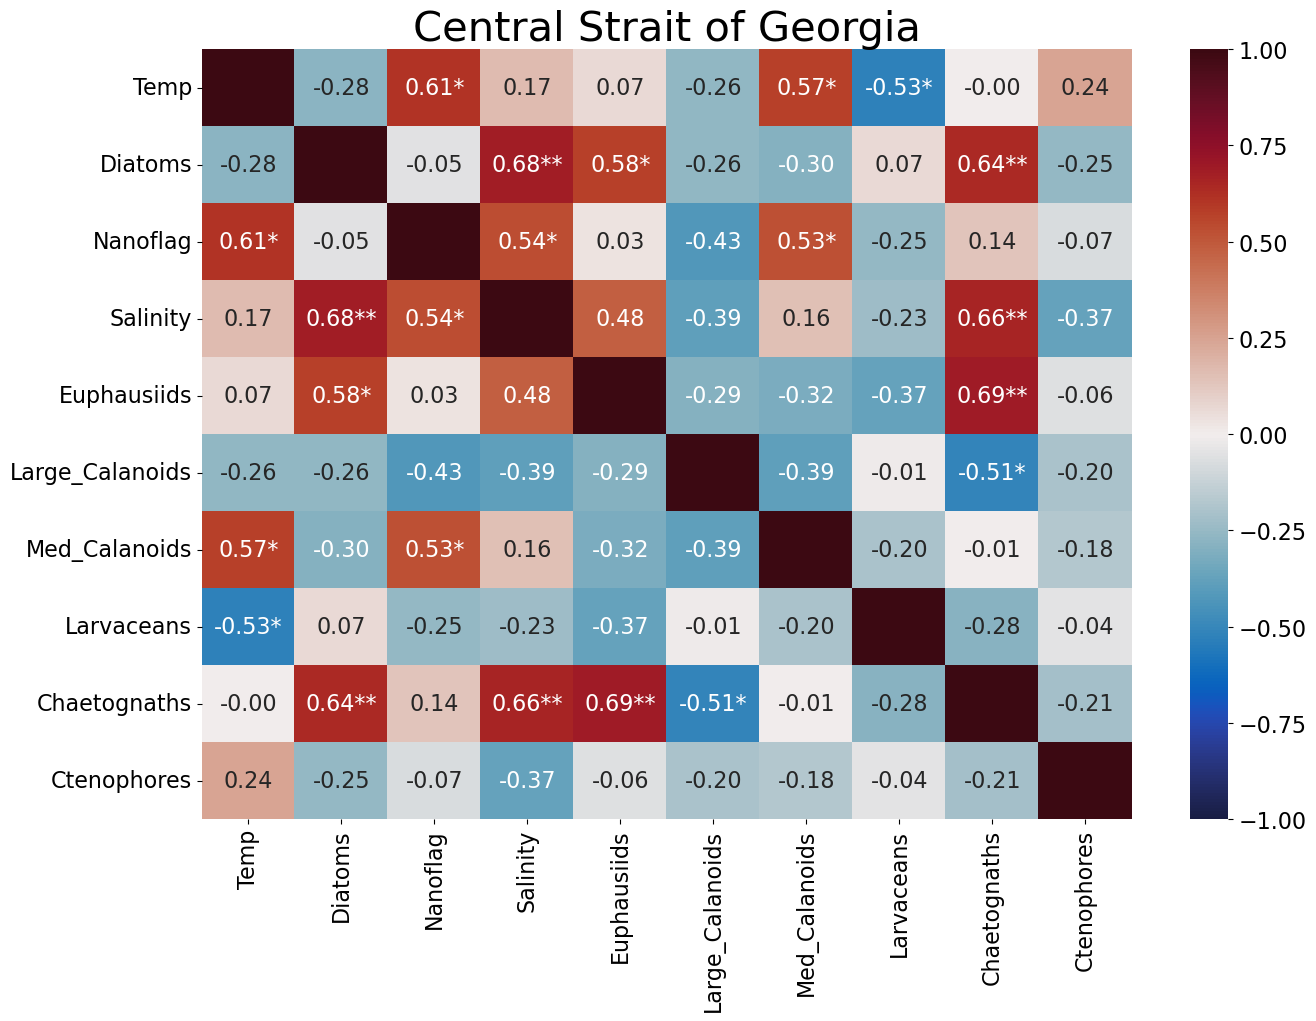

In [15]:
fig,ax=plt.subplots(1,1,figsize=(15,10))

cm1=cmocean.cm.balance
#mask=np.invert(np.tril(p_values<0.05))
sns.heatmap(Central.corr(),annot = inot,cmap=cm1,vmin=-1,vmax=1,fmt = '') 
#plt.savefig('PhenologyCorrelationHeatMap.jpg',bbox_inches='tight')
#plt.savefig('Fig5PhenologyCorrelationHeatMap_revised.jpg', bbox_inches='tight',dpi=1000,transparent=False)
ax.set_title('Central Strait of Georgia',fontsize=30)



In [16]:
JdF=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/MHW/JdF_HeatMapCorrelations.xlsx',engine='openpyxl')

In [17]:
JdF

,Year,Temp,Diatoms,Nanoflag,Salinity,Halocline,Euphausiids,Large_Calanoids,Med_Calanoids,Larvaceans,Chaetognaths,Ctenophores
0,2007,8.961532,0.764202,0.223976,31.494066,0.038116,48.322624,0.754225,4.709167,0.164965,27.691072,1.001697
1,2008,8.791658,0.745690,0.228534,31.731709,0.044573,10.858057,3.147255,4.008249,39.496642,9.635644,0.677906
2,2009,9.000573,0.782121,0.216719,31.742666,0.052386,6.056579,1.195415,40.444418,11.793213,4.677660,1.009812
3,2010,9.345949,0.681451,0.225971,31.401261,0.043843,7.324166,1.969559,15.566737,10.036709,22.691697,0.000000
4,2014,9.484262,0.742920,0.234519,31.401635,0.038922,21.776364,0.000000,24.522776,5.639118,20.666119,0.000000
5,2015,9.989345,0.762778,0.236360,31.370157,0.037946,36.460901,1.277073,9.457741,6.747687,12.187761,1.173338
6,2016,9.846296,0.750225,0.217144,31.441908,0.038825,25.798762,1.645325,6.796826,3.185255,16.019488,11.477050
7,2017,9.202538,0.763328,0.223098,31.387320,0.042864,49.427557,1.030802,13.560551,1.457388,8.385588,1.753061
8,2018,9.251754,0.816396,0.219967,31.550429,0.046656,37.755202,0.667773,10.463386,1.700325,21.639614,0.608629
9,2019,9.074443,0.819073,0.199981,31.835273,0.039149,50.933270,0.461468,8.991670,0.893533,12.722002,0.325468


In [18]:
JdF.keys()

Index(['Year', 'Temp', 'Diatoms', 'Nanoflag', 'Salinity', 'Halocline',
       'Euphausiids', 'Large_Calanoids', 'Med_Calanoids', 'Larvaceans',
       'Chaetognaths', 'Ctenophores'],
      dtype='object')

In [19]:
JdF.drop(labels=['Year','Halocline'],axis=1,inplace=True)

In [20]:
#Phen.rename(columns={'Wind (Jan-May)':'Wind','PAR (Feb-May)':'PAR','SSS (Jan-May)':'SSS','SpringSST':'SST','Fraser Peak Discharge':'Fraser River Discharge','Bloom_Start':'Bloom Initiation','Bloom_Intensity':'Bloom Intensity','Bloom_Magnitude':'Bloom Magnitude'},inplace=True)

In [21]:
JdF.cov()

,Temp,Diatoms,Nanoflag,Salinity,Euphausiids,Large_Calanoids,Med_Calanoids,Larvaceans,Chaetognaths,Ctenophores
Temp,0.138848,0.000871,0.002413,-0.025910,-0.932150,-0.021134,0.195925,-0.916767,-0.069395,0.582144
Diatoms,0.000871,0.001892,0.000008,0.003665,0.324002,-0.006537,0.014050,-0.085754,-0.091163,-0.004131
Nanoflag,0.002413,0.000008,0.000154,-0.000509,-0.091793,0.002669,0.023149,0.044198,-0.006709,-0.000854
Salinity,-0.025910,0.003665,-0.000509,0.024405,-0.480573,0.023471,0.310890,0.653374,-0.497206,-0.074633
Euphausiids,-0.932150,0.324002,-0.091793,-0.480573,356.579104,-5.932138,-109.743262,-126.067371,26.103569,-7.436859
Large_Calanoids,-0.021134,-0.006537,0.002669,0.023471,-5.932138,0.637681,-1.986326,6.479637,-1.797631,0.414665
Med_Calanoids,0.195925,0.014050,0.023149,0.310890,-109.743262,-1.986326,104.688340,3.886092,-27.472249,-4.455116
Larvaceans,-0.916767,-0.085754,0.044198,0.653374,-126.067371,6.479637,3.886092,110.412256,-26.725570,-3.089699
Chaetognaths,-0.069395,-0.091163,-0.006709,-0.497206,26.103569,-1.797631,-27.472249,-26.725570,47.089879,-1.427312
Ctenophores,0.582144,-0.004131,-0.000854,-0.074633,-7.436859,0.414665,-4.455116,-3.089699,-1.427312,9.345711


In [22]:
icor,ip,inot=getPearsonR(JdF) #icor = correlation, ip = pvalue, inot=annotation

In [23]:
ip

array([[0.00000000e+00, 8.61599946e-01, 6.72123212e-02, 1.27477711e-01,
        6.66154124e-01, 8.17648064e-01, 8.67586886e-01, 4.41330558e-01,
        9.29871330e-01, 7.42954936e-02],
       [8.61599946e-01, 0.00000000e+00, 9.61105302e-01, 5.71362225e-02,
        1.82226572e-01, 5.38030997e-01, 9.18446083e-01, 5.39307400e-01,
        3.10180868e-01, 9.19746728e-01],
       [6.72123212e-02, 9.61105302e-01, 0.00000000e+00, 3.86062823e-01,
        1.85370266e-01, 3.73374001e-01, 5.50889323e-01, 2.57004270e-01,
        7.97983814e-01, 9.41758001e-01],
       [1.27477711e-01, 5.71362225e-02, 3.86062823e-01, 0.00000000e+00,
        5.94891757e-01, 5.38188774e-01, 5.24294054e-01, 1.77991178e-01,
        1.10396311e-01, 6.10172916e-01],
       [6.66154124e-01, 1.82226572e-01, 1.85370266e-01, 5.94891757e-01,
        1.89150761e-87, 1.83555706e-01, 4.28578885e-02, 1.96205261e-02,
        5.09281595e-01, 6.74891839e-01],
       [8.17648064e-01, 5.38030997e-01, 3.73374001e-01, 5.38188774e-01,
   

In [24]:
icor

array([[ 1.        ,  0.05373236,  0.5221065 , -0.4451031 , -0.13247636,
        -0.07102514,  0.05138903, -0.23414281, -0.02713912,  0.51103944],
       [ 0.05373236,  1.        ,  0.01504036,  0.53936341,  0.39449499,
        -0.18821758,  0.0315729 , -0.18763752, -0.3054419 , -0.03106789],
       [ 0.5221065 ,  0.01504036,  1.        , -0.26260096, -0.39190739,
         0.26942554,  0.18240058,  0.33911605, -0.07882181, -0.02253136],
       [-0.4451031 ,  0.53936341, -0.26260096,  1.        , -0.16290706,
         0.18814585,  0.19449848,  0.39802634, -0.46380084, -0.15627265],
       [-0.13247636,  0.39449499, -0.39190739, -0.16290706,  1.        ,
        -0.39339754, -0.56800318, -0.6353545 ,  0.20144577, -0.12882656],
       [-0.07102514, -0.18821758,  0.26942554,  0.18814585, -0.39339754,
         1.        , -0.24310833,  0.77221882, -0.32804623,  0.16985947],
       [ 0.05138903,  0.0315729 ,  0.18240058,  0.19449848, -0.56800318,
        -0.24310833,  1.        ,  0.03614559

In [25]:
inot

array([['', '0.05', '0.52', '-0.45', '-0.13', '-0.07', '0.05', '-0.23',
        '-0.03', '0.51'],
       ['0.05', '', '0.02', '0.54', '0.39', '-0.19', '0.03', '-0.19',
        '-0.31', '-0.03'],
       ['0.52', '0.02', '', '-0.26', '-0.39', '0.27', '0.18', '0.34',
        '-0.08', '-0.02'],
       ['-0.45', '0.54', '-0.26', '', '-0.16', '0.19', '0.19', '0.40',
        '-0.46', '-0.16'],
       ['-0.13', '0.39', '-0.39', '-0.16', '', '-0.39', '-0.57*',
        '-0.64*', '0.20', '-0.13'],
       ['-0.07', '-0.19', '0.27', '0.19', '-0.39', '', '-0.24', '0.77**',
        '-0.33', '0.17'],
       ['0.05', '0.03', '0.18', '0.19', '-0.57*', '-0.24', '', '0.04',
        '-0.39', '-0.14'],
       ['-0.23', '-0.19', '0.34', '0.40', '-0.64*', '0.77**', '0.04', '',
        '-0.37', '-0.10'],
       ['-0.03', '-0.31', '-0.08', '-0.46', '0.20', '-0.33', '-0.39',
        '-0.37', '', '-0.07'],
       ['0.51', '-0.03', '-0.02', '-0.16', '-0.13', '0.17', '-0.14',
        '-0.10', '-0.07', '']], dtype='

In [26]:
np.shape(JdF)

(13, 10)

Text(0.5, 1.0, 'Juan de Fuca')

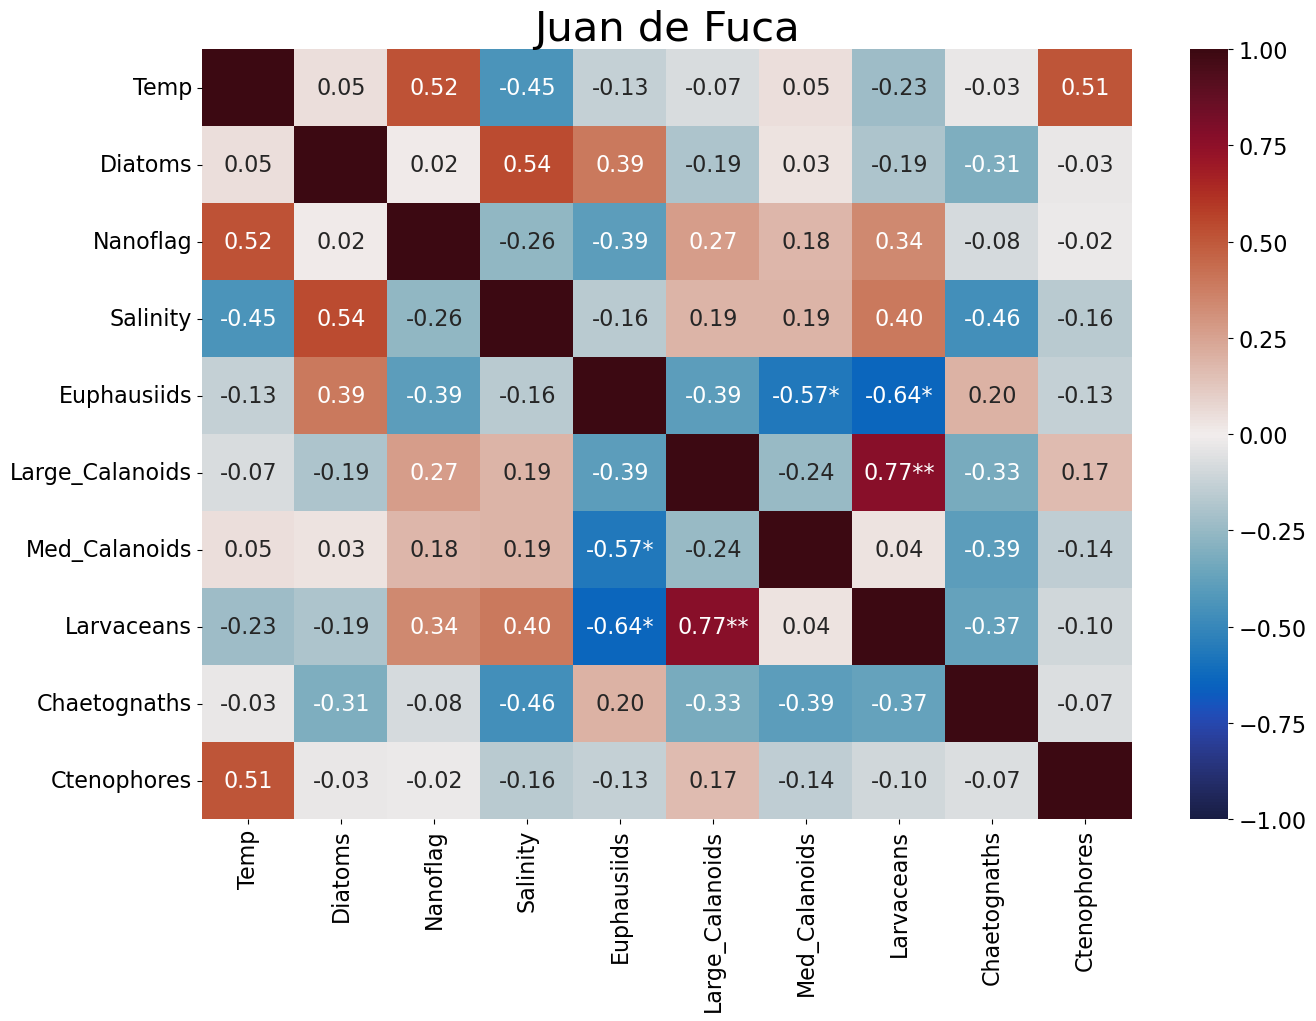

In [27]:
fig,ax=plt.subplots(1,1,figsize=(15,10))

cm1=cmocean.cm.balance
#mask=np.invert(np.tril(p_values<0.05))
sns.heatmap(JdF.corr(),annot = inot,cmap=cm1,vmin=-1,vmax=1,fmt = '') 
#plt.savefig('PhenologyCorrelationHeatMap.jpg',bbox_inches='tight')
#plt.savefig('Fig5PhenologyCorrelationHeatMap_revised.jpg', bbox_inches='tight',dpi=1000,transparent=False)
ax.set_title('Juan de Fuca',fontsize=30)

